<a href="https://colab.research.google.com/github/adityaray7/DS201-Assignments/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import wave, sys
from sklearn.linear_model import LinearRegression

In [ ]:
#using plotly to plot graphs
import plotly.io as plt_io

plt_io.templates["custom_dark"] = plt_io.templates["plotly_dark"]

plt_io.templates["custom_dark"]['layout']['paper_bgcolor'] = '#30404D'
plt_io.templates["custom_dark"]['layout']['plot_bgcolor'] = '#30404D'

plt_io.templates['custom_dark']['layout']['yaxis']['gridcolor'] = '#4f687d'
plt_io.templates['custom_dark']['layout']['xaxis']['gridcolor'] = '#4f687d'

plt_io.templates.default = "custom_dark"

In [ ]:
# Generate random values for two variables
var1 = np.random.normal(50, 10, 100) # Generate 100 values from normal distribution with mean 50 and sd 10
var2 = np.random.normal(1000, 200, 100)  # Generate 100 values from normal distribution with mean 1000 and sd 200

var1_outlier = np.random.normal(1, 5, 1) # Generating a single outlier to show problem with min-max normalisation further


***Scatter plot before Normalization***


In [ ]:
# scatter plot to show the relationship between the two variables var1 and var2
fig1 = go.Figure(data=go.Scatter(x=var1, y=var2, mode='markers'))
fig1.update_layout(title='Scatter plot before normalization', xaxis_title='Variable 1', yaxis_title='Variable 2')
fig1.show()

## **Min-Max Normalization**

Data preprocessing technique that scales numeric features to a new range of values between 0 and 1

In [ ]:
var1_norm = (var1 - np.min(var1)) / (np.max(var1) - np.min(var1))
var2_norm = (var2 - np.min(var2)) / (np.max(var2) - np.min(var2))

***Scatter plot after Normalization***


In [ ]:
# After min-max normalization, as the range of both variables is now between 0 and 1, it is easier to compare and analyze the data
fig2 = go.Figure(data=go.Scatter(x=var1_norm, y=var2_norm, mode='markers'))
fig2.update_layout(title='Scatter plot after min-max normalization', xaxis_title='Normalized variable 1', yaxis_title='Normalized variable 2')
fig2.show()

***Regression model before normalization***

In [ ]:
reg1 = LinearRegression().fit(var1.reshape(-1, 1), var2) # setting var1 as predictor and var2 as target variable
score1 = reg1.score(var1.reshape(-1, 1), var2) # R squared score of model fitted above
x_range = np.linspace(np.min(var1), np.max(var1), 100)
y_pred1 = reg1.predict(x_range.reshape(-1, 1))
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=var1, y=var2, mode='markers'))
fig3.add_trace(go.Scatter(x=x_range, y=y_pred1, mode='lines', line=dict(color='red')))
fig3.update_layout(title=f'Regression model before normalization (score={score1:.2f})',
                   xaxis_title='Variable 1',
                   yaxis_title='Variable 2')
fig3.show()

***Regression model after min-max normalization***

In [ ]:
reg2 = LinearRegression().fit(var1_norm.reshape(-1, 1), var2_norm)
score2 = reg2.score(var1_norm.reshape(-1, 1), var2_norm)
x_norm_range = np.linspace(0, 1, 100)
y_norm_pred2 = reg2.predict(x_norm_range.reshape(-1, 1))
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=var1_norm, y=var2_norm, mode='markers'))
fig4.add_trace(go.Scatter(x=x_norm_range, y=y_norm_pred2, mode='lines', line=dict(color='red')))
fig4.update_layout(title=f'Regression model after min-max normalization (score={score2:.2f})',
                   xaxis_title='Normalized variable 1',
                   yaxis_title='Normalized variable 2')
fig4.show()

***Problem :*** Sensitivity to outliers, which can be shown using scatter plot

In [ ]:
# Adding outlier to var1 and creating scatter plot before and after normalization
var1 = np.concatenate([var1_outlier, var1])

# Normalising var1 and var2
var1_norm = (var1 - np.min(var1)) / (np.max(var1) - np.min(var1))
var2_norm = (var2 - np.min(var2)) / (np.max(var2) - np.min(var2))

scatter_before = go.Scatter(x=var1, y=var2, mode='markers', name='Before Normalization')
scatter_after = go.Scatter(x=var1_norm, y=var2_norm, mode='markers', name='After Normalization')

fig = make_subplots(rows=2, cols=1, vertical_spacing=0.10)

fig.add_trace(scatter_before, row=1, col=1)
fig.add_trace(scatter_after, row=2, col=1)


fig.update_layout(height=600, width=800, title_text="Scatter Plot - Min-Max Normalization more Sensitive to Outliers", xaxis_title='var1', yaxis_title='var2',)
fig.layout.template = 'custom_dark'
fig.show()

## **Z-score Normalization**



In [ ]:
var1_znorm = (var1 - np.mean(var1)) / np.std(var1)
var2_znorm = (var2 - np.mean(var2)) / np.std(var2)

***Scatter plot after Z-score Normalization***

In [ ]:
fig3 = go.Figure(data=go.Scatter(x=var1_znorm, y=var2_znorm, mode='markers'))
fig3.update_layout(title='Scatter plot after z-score normalization', xaxis_title='Z-score of variable 1', yaxis_title='Z-score of variable 2')
fig3.show()

 ***Benefit:***
Less sensitivity to outliers


In [ ]:
# Concatenate X variables and apply z-score normalization to X and Y
var1 = np.concatenate([var1, var1_outlier])
var1_znorm= (var1 - np.mean(var1)) / np.std(var1)

# Create scatter plot before and after normalization
scatter_before = go.Scatter(x=var1, y=var2, mode='markers', name='Before Normalization')
scatter_after = go.Scatter(x=var1_znorm, y=var2_znorm, mode='markers', name='After Normalization')

fig = make_subplots(rows=2, cols=1, vertical_spacing=0.10)

fig.add_trace(scatter_before, row=1, col=1)
fig.add_trace(scatter_after, row=2, col=1)


fig.update_layout(height=600, width=800, title_text="Scatter Plot - Z-Score Normalization Less Sensitive to Outliers", xaxis_title='var1', yaxis_title='var2',)
fig.layout.template = 'custom_dark'
fig.show()

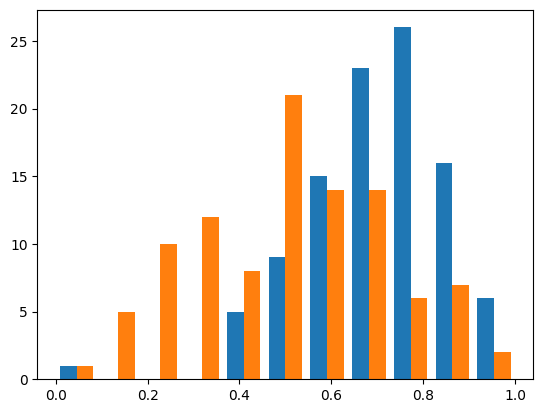

In [ ]:
import matplotlib.pyplot as plt
plt.hist([var1_norm,var2_norm], bins='auto') 
plt.show()

***Problem:***
Arbitrary use, can create problems in reducing the discrimination if the data is divided in different categories


In [ ]:
# Generate random data with two categories in X
x_a = np.random.normal(20, 10, 50)
x_b = np.random.normal(70, 20, 50)
y = np.random.normal(50, 10, 100)

# Concatenate X variables and apply z-score normalization to X and Y
x = np.concatenate([x_a, x_b])
x_norm = (x - np.mean(x)) / np.std(x)
y_norm = (y - np.mean(y)) / np.std(y)

# Create scatter plot before and after normalization
scatter_before = go.Scatter(x=x, y=y, mode='markers', name='Before Normalization')
scatter_after = go.Scatter(x=x_norm, y=y, mode='markers', name='After Normalization')

fig = make_subplots(rows=2, cols=1, vertical_spacing=0.10)

fig.add_trace(scatter_before, row=1, col=1)
fig.add_trace(scatter_after, row=2, col=1)


fig.update_layout(height=600, width=800, title_text="Scatter Plot - Z-Score Normalization create problem in reducing discrimination", xaxis_title='var1', yaxis_title='var2',)
fig.layout.template = 'custom_dark'
fig.show()
